In [28]:
import numpy as np
import pandas as pd
import librosa
import torch
import torchaudio
from torchaudio import transforms
from pathlib import Path
from matplotlib import pylab as plt
from tqdm.auto import tqdm
from IPython.display import Audio
import soundfile as sf  


In [7]:
data = Path("audiotouse")
wav_files = data.glob("*.wav")
wav_files_list = list(wav_files)

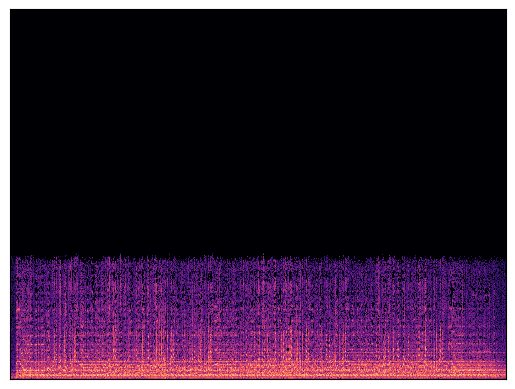

In [14]:
y, _ = librosa.load(wav_files_list[0])
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D)

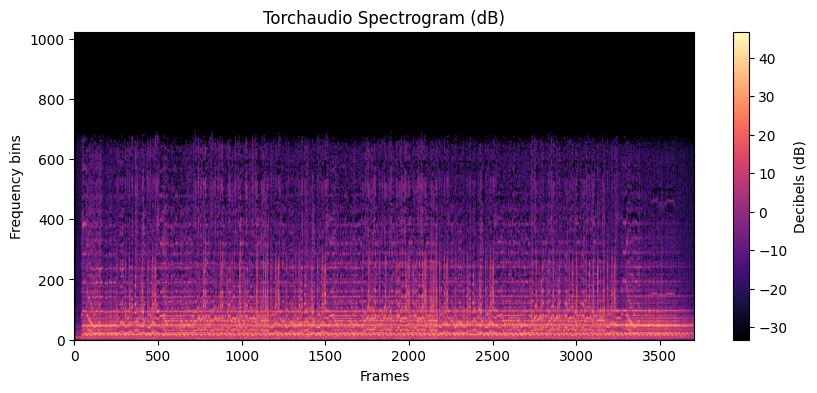

In [ ]:
import torchaudio
import torchaudio.transforms as T
import torch
import matplotlib.pyplot as plt

# Load the first audio file using torchaudio
waveform, sample_rate = torchaudio.load(wav_files_list[0])

# Convert stereo to mono
if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)

# Define parameters to match librosa
n_fft = 2048
hop_length = 512
window = torch.hann_window(n_fft)  # Ensure the window matches librosa

stft_transform = torch.stft(waveform.squeeze(0), n_fft=n_fft, hop_length=hop_length, window=window, return_complex=True)

magnitude = torch.abs(stft_transform)

D = T.AmplitudeToDB(stype="magnitude", top_db=80)(magnitude)

# Plot spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(D.numpy(), aspect='auto', origin='lower', cmap='magma')
plt.colorbar(label="Decibels (dB)")
plt.xlabel("Frames")
plt.ylabel("Frequency bins")
plt.title("Torchaudio Spectrogram (dB)")
plt.show()


In [31]:
import librosa
import numpy as np
import soundfile as sf

# Load the audio
y, sr = librosa.load(wav_files_list[0], sr=None)

# Compute STFT
D = librosa.stft(y)

# Estimate noise using first few frames (assuming noise-only part exists)
noise_mag = np.mean(np.abs(D[:, :5]), axis=1, keepdims=True)

# Perform spectral subtraction (subtract estimated noise from magnitude)
D_denoised = np.abs(D) - noise_mag
D_denoised = np.maximum(D_denoised, 0)  # Avoid negative values

# Reconstruct with original phase
D_reconstructed = D_denoised * np.exp(1j * np.angle(D))

# Inverse STFT
y_denoised = librosa.istft(D_reconstructed)

# Save the denoised audio
sf.write("denoised_audio.wav", y_denoised, sr)

print("Denoised audio saved as 'denoised_audio.wav'")


Denoised audio saved as 'denoised_audio.wav'


In [27]:
wav_files_list[0]

PosixPath('audiotouse/01545-indian-music-vintagesense-1943sanjog-04-jaanbachisolakhonpaaye-vintagesense-song-id-01545.wav')